In [1]:
import numpy
from matplotlib import pyplot
import seaborn

In [2]:
seaborn.set_style('ticks')

In [3]:
numpy.random.seed(134)

In [4]:
# 2000 randomly generated 10-armed bandit problems
k = 10
n = 2000

# means of action values are selected from normal
# distribution with mean 0 and variance 1
action_values = numpy.random.randn(n, k)
action_values.shape

(2000, 10)

Text(0,0.5,'reward distribution')

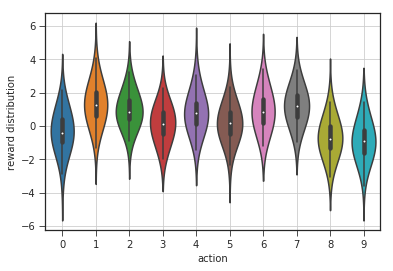

In [5]:
# a 10-armed bandit problem
#
# when an action is applied the reward is
# selected from a normal distribution with corresponding
# action value mean and variance 1
action_values_sample = action_values[0] + numpy.random.randn(128, k)
ax = seaborn.violinplot(data=action_values_sample, bw=1)
ax.grid()
ax.set_xlabel('action')
ax.set_ylabel('reward distribution')

In [6]:
def bandit_reward(a, action_values):
    """Take an action a and return a corresponding reward R."""
    return numpy.random.randn() + action_values[a]

action_values[0, 0], bandit_reward(0, action_values[0])

(-0.2243154555973462, -1.8011878086299935)

In [7]:
def epsilon_greedy(epsilon, time_steps, action_values):
    # estimate of action values
    Q = numpy.zeros(k)
    # action selections
    N = numpy.zeros(k)
    # rewards history for average
    Rs = numpy.zeros(time_steps)

    for t in range(time_steps):
        # choose an action
        if numpy.random.rand() < 1 - epsilon:
            A = numpy.argmax(Q)
        else:
            A = numpy.random.randint(0, k)
        # reward recived
        R = bandit_reward(A, action_values)
        # store the reward at time step t for average
        Rs[t] = R
        # update the estimated action value
        N[A] += 1
        Q[A] += (R - Q[A]) / N[A]

    return Rs

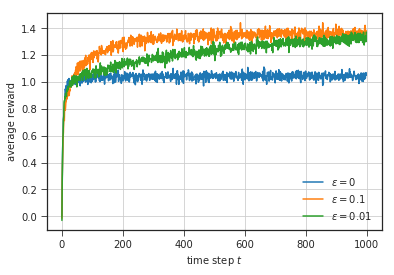

In [8]:
time_steps = 1000
epsilons = [0, 0.1, 0.01]
average_Rss = numpy.zeros((len(epsilons), time_steps))

for i, epsilon in enumerate(epsilons):
    Rss = numpy.zeros((n, time_steps))
    for j in range(n):
        Rss[j] = epsilon_greedy(epsilon, time_steps, action_values[j])
    average_Rss[i] = Rss.mean(axis=0)

for epsilon, average_Rs in zip(epsilons, average_Rss):
    pyplot.plot(average_Rs, label=r'$\varepsilon = {}$'.format(epsilon))
pyplot.legend()
pyplot.xlabel('time step $t$')
pyplot.ylabel('average reward')
pyplot.grid()